# Scatter plot and bar plot of differential regulation & differential expression between two cell clusters
This is a detailed tutorial for differential regulation & differential expression analyses. For a brief tutorial on every step, see [main.ipynb](main.ipynb).
## Load data


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from dictys.net import network
from dictys.plot.static import fig_diff_scatter,fig_diff_rank
d0=network.from_file('../../data/static.h5')


## Initial plots
Scatter plot

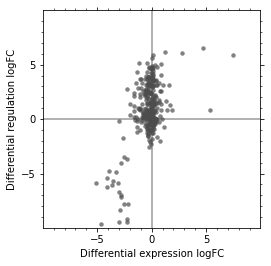

In [2]:
#Cell type/state names to compare in (reference, alternative) format
states=('Progenitor','Erythroid')
fig=plt.figure()
ax=fig.add_subplot(111)
data=fig_diff_scatter(d0,ax,states)


Bar plot of logFC based ranking

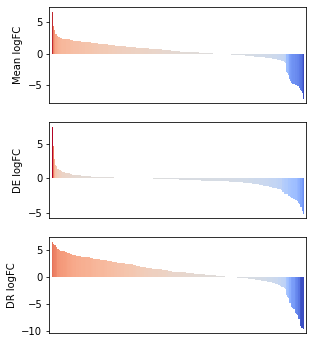

In [3]:
fig2=fig_diff_rank(data)


## Annotating top genes

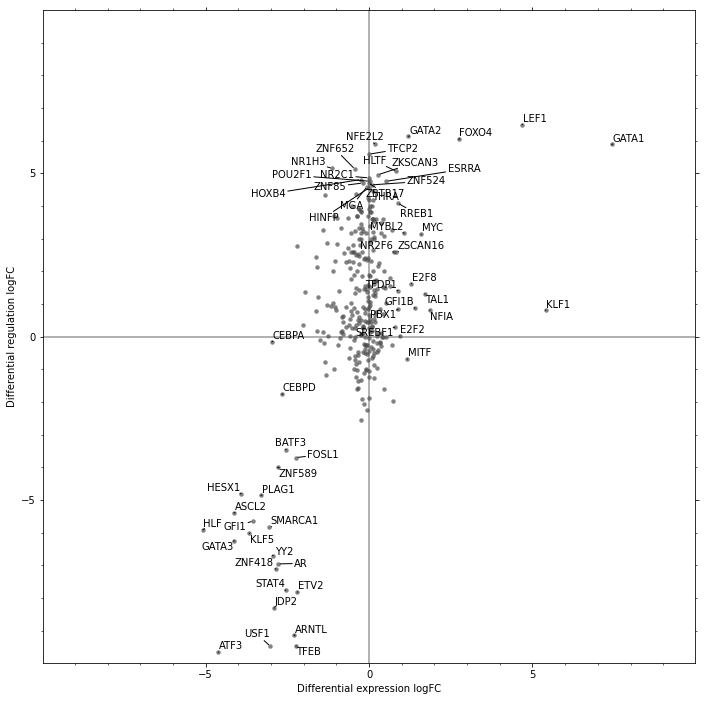

In [4]:
#Number of top genes to annotate on each side
ntop=20
#Find genes to annotate
t1=np.partition(data.values,[ntop-1,-ntop],axis=0)
t1=((data.values<=t1[ntop-1])|(data.values>=t1[-ntop])).any(axis=1)
annotate=list(data.index[t1])
#Draw figure
fig=plt.figure(figsize=(12,12))
ax=fig.add_subplot(111)
data=fig_diff_scatter(d0,ax,states,annotate=annotate)


## Annotating select genes

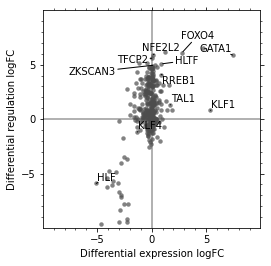

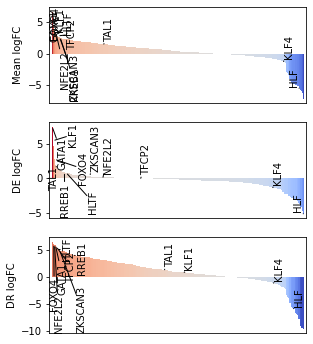

In [5]:
#Cell type/state names to compare in (reference, alternative) format
annotate='HLF,KLF4,ZKSCAN3,TFCP2,NFE2L2,HLTF,RREB1,TAL1,KLF1,FOXO4,GATA1'.split(',')
fig=plt.figure()
ax=fig.add_subplot(111)
data=fig_diff_scatter(d0,ax,states,annotate=annotate)
fig2=fig_diff_rank(data,annotate=annotate)


## Annotating all genes

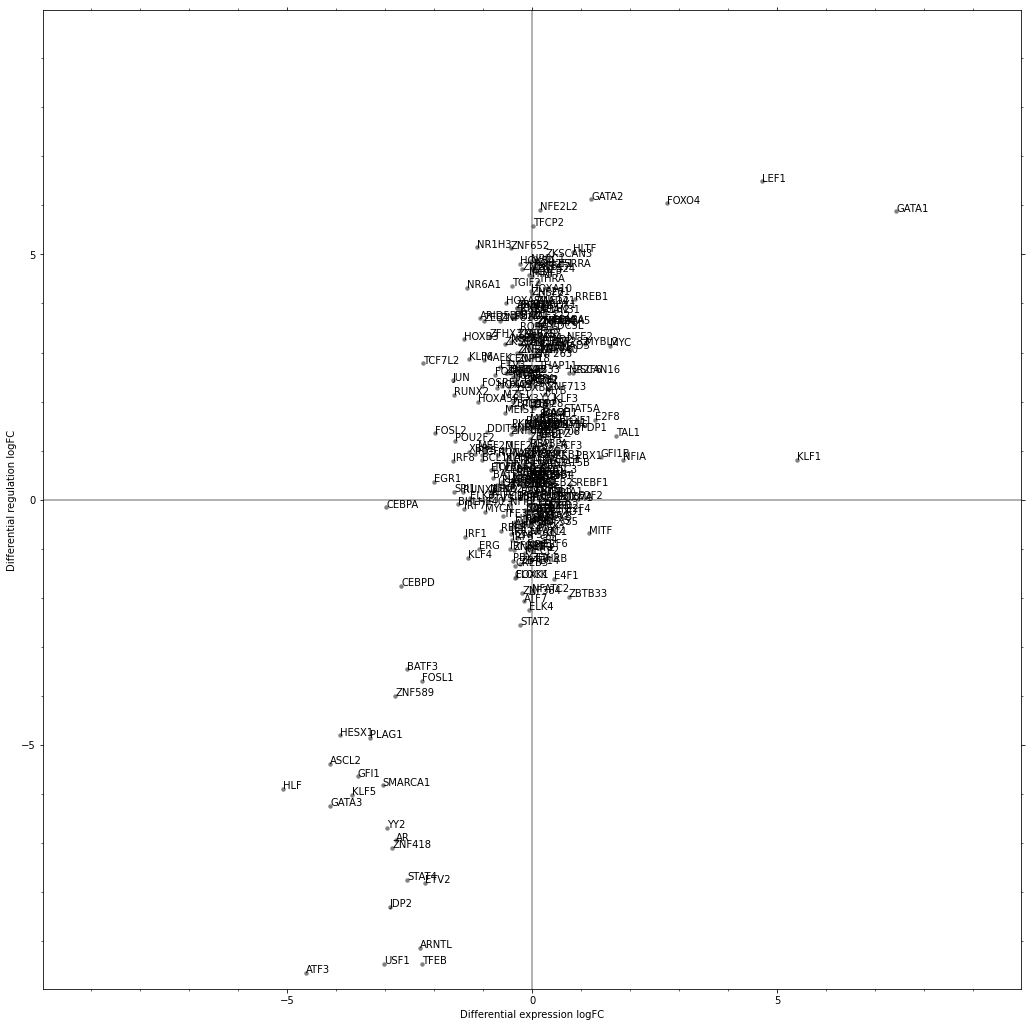

In [6]:
fig=plt.figure(figsize=(18,18))
ax=fig.add_subplot(111)
data=fig_diff_scatter(d0,ax,states,annotate='all',ka_adjust_text=None)


## Data inspection

In [7]:
data.head()

,DE_logFC,DR_logFC
AHR,-0.355064,-0.552541
AR,-2.782750,-6.954196
ARID3A,-0.318401,3.906891
ARID5B,-1.074636,3.700440
ARNT,0.177926,0.671578


In [8]:
data['DE_logFC'].values

array([-3.55064076e-01, -2.78275007e+00, -3.18401355e-01, -1.07463579e+00,
        1.77925535e-01, -2.29897668e+00, -4.13448443e+00, -5.51277861e-02,
       -1.04109557e-02, -4.61228822e+00, -2.83181936e-02, -1.76713221e-01,
       -1.69058826e-01,  2.10612310e-01, -1.57065481e-01, -7.89357794e-01,
       -2.55275942e+00, -1.02550042e+00, -1.50440728e+00, -1.76896431e-01,
        4.19942317e-01,  2.89285154e-02,  3.79071580e-01, -2.97542283e+00,
       -4.36750600e-01, -2.66925386e+00, -5.93917737e-01,  1.23076970e-01,
       -4.89339810e-01, -3.58657297e-01, -5.19172436e-02, -3.41257992e-01,
       -2.53103725e-01, -3.73598762e-01, -1.55688661e-02, -3.47899723e-01,
       -1.81108297e-01,  3.32546509e-02, -9.27007096e-01,  3.27006642e-01,
        9.36366290e-01,  2.37158247e-01,  6.87348413e-01,  8.08947828e-02,
        2.26568701e-01,  1.28986355e+00,  4.50635867e-01, -2.00828334e+00,
       -1.53612879e-02, -1.32474272e-01,  2.39262144e-01, -1.26144910e+00,
       -5.51412498e-02, -

## On B cells v.s. Progenitors

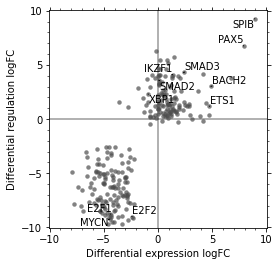

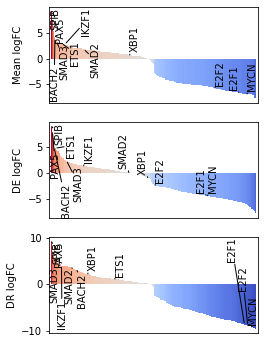

In [9]:
states=('Progenitor','B')
annotate='SPIB,PAX5,ETS1,BACH2,IKZF1,SMAD3,SMAD2,XBP1,E2F1,MYCN,E2F2'.split(',')
fig=plt.figure()
ax=fig.add_subplot(111)
data=fig_diff_scatter(d0,ax,states,annotate=annotate)
fig2=fig_diff_rank(data,annotate=annotate)
